<a href="https://colab.research.google.com/github/Opeyemiiii/opeyemi_python_and_Machine-learning_project_portfolio/blob/main/Parkinson_disease_detection_using_SVM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [ ]:
parkinson_data = pd.read_csv('/content/Parkinsson disease.csv')
parkinson_data.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
169,phon_R01_S42_5,240.301,245.135,219.783,0.00517,0.00002,0.00316,0.00283,0.00949,0.02018,...,0.03529,0.00965,21.020,0,0.371837,0.646167,-7.169701,0.073298,2.266432,0.100881
157,phon_R01_S37_5,117.963,134.209,100.757,0.01813,0.00015,0.01117,0.00718,0.03351,0.04912,...,0.07830,0.10748,19.075,1,0.630547,0.646786,-3.444478,0.303214,2.964568,0.261305
11,phon_R01_S02_6,91.904,115.871,86.292,0.00540,0.00006,0.00281,0.00336,0.00844,0.02752,...,0.04272,0.01141,21.414,1,0.583390,0.792520,-4.960234,0.363566,2.642476,0.275931
171,phon_R01_S43_1,112.547,133.374,105.715,0.00355,0.00003,0.00166,0.00190,0.00499,0.01358,...,0.01992,0.00435,26.436,0,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376


In [ ]:
parkinson_data.shape

(195, 24)

In [ ]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Distribution of target data

In [ ]:
parkinson_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
parkinson_data.groupby('status')['MDVP:RAP','MDVP:PPQ'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MDVP:RAP,MDVP:PPQ
status,,
0,0.001925,0.002056
1,0.003757,0.003900


Data Preprocessing

In [ ]:
x = parkinson_data.drop(['name', 'status'], axis = 1)
y = parkinson_data['status']

Data Splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 2)
print(x_test.shape)


(39, 22)


In [ ]:
y_test_dataframe = y_test
y_test_dataframe = pd.DataFrame(y_test_dataframe)
y_test_dataframe.value_counts()

status
1         31
0          8
dtype: int64

Standardization

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.std(), x_test.std())

1.0 0.7472925309875105


Building the model

In [ ]:
model = svm.SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
def model_evaluator(evaluator, feature, label):
  prediction = evaluator.predict(feature)

  print(f'accuracy_score: {accuracy_score(prediction, label)}')
  print(f"recall_score : {recall_score(prediction, label, average = 'weighted')}")
  print(f"precision : {precision_score(prediction, label, average = 'weighted')}")


In [ ]:
model_evaluator(model, x_train, y_train)
model_evaluator(model, x_test, y_test)

accuracy_score: 0.9166666666666666
recall_score : 0.9166666666666666
precision : 0.94375
accuracy_score: 0.8974358974358975
recall_score : 0.8974358974358975
precision : 0.9487179487179487


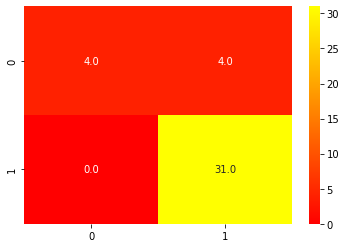

In [ ]:
cmt = confusion_matrix(y_test, model.predict(x_test))
axl = sns.heatmap(cmt , cmap = 'autumn', annot = True, fmt ='.1f')
axl

In [ ]:
input_data = (116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.0349,0.04825,0.04465,0.1047,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.33218,0.410335)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)


if prediction == 0:
  print('HAVE PARKINSON DISEASE')
else:
  print('DOES NOT HAVE PARKINSON DISEASE')

DOES NOT HAVE PARKINSON DISEASE


Saving the model

In [ ]:
import pickle

In [ ]:
file_name = 'trained_model.sav'
pickle.dump(model, open(file_name, 'wb'))

In [ ]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data = (116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.0349,0.04825,0.04465,0.1047,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.33218,0.410335)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)


if prediction == 0:
  print('HAVE PARKINSON DISEASE')
else:
  print('DOES NOT HAVE PARKINSON DISEASE')

DOES NOT HAVE PARKINSON DISEASE
